In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import math
import sklearn

%matplotlib inline

In [36]:
data = pd.read_csv('linkedin data.csv', usecols = range(0,8), parse_dates=[1,7])

In [39]:
industry_mean = data.groupby('industry').mean()
industry_total = data.groupby('industry').sum()

In [41]:
top5 = industry_total.sort_values(by='employees_on_platform',ascending=False).head()

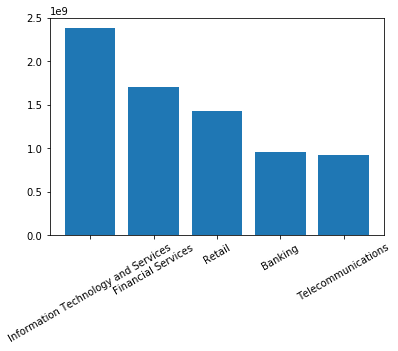

In [42]:
plt.bar(top5.index, top5['employees_on_platform'])
plt.xticks(rotation=30,rotation_mode=None)
plt.show()

In [43]:
data['year'] = [data['as_of_date'][i].year for i in range(0,len(data['as_of_date']))]
ts1 = data.groupby(['year']).sum()

In [44]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

companies = sorted(data['company_name'].unique().tolist())

selection = widgets.Dropdown(options=companies)

@interact
def show_scatter(x=selection):
    selected_company = data[data['company_name']==x]
    plt.plot(selected_company['as_of_date'],selected_company['employees_on_platform'])
    plt.show()
    print(selected_company['employees_on_platform'].mean())

interactive(children=(Dropdown(description='x', options=(' Professional Diversity Network', '1-800-FLOWERS.COM…

In [45]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

industries = data['industry'].unique().tolist()

selection2 = widgets.Dropdown(options=industries)

@interact
def show_scatter2(x=selection2):
    selected_industry = data[data['industry']==x]
    color_dict = dict(zip(sorted(selected_industry['company_name'].unique().tolist()),
                     range(0,len(sorted(selected_industry['company_name'].unique().tolist())))))
    selected_industry['color'] = [color_dict.get(x) for x in selected_industry['company_name']]
    filtered_companies = selected_industry['company_name'].unique().tolist()
    plt.scatter(selected_industry['as_of_date'], 
                selected_industry['employees_on_platform'],
                c = selected_industry['color'])
    plt.show()
    print(selected_industry['employees_on_platform'].mean())
    print(len(filtered_companies))
    print(selected_industry.groupby('company_name').mean()['employees_on_platform'].sort_values(ascending=False))

interactive(children=(Dropdown(description='x', options=('Investment Banking', 'Aviation & Aerospace', 'Pharma…